In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
loan_data=pd.read_csv('drive/My Drive/Data/Demo_Data_Loan.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


In [4]:
print(loan_data.shape)

(367, 13)


In [5]:
loan_data.Loan_ID.value_counts(dropna=False)

LP001015    1
LP002389    1
LP002383    1
LP002376    1
LP002375    1
           ..
LP001627    1
LP001622    1
LP001613    1
LP001611    1
LP002989    1
Name: Loan_ID, Length: 367, dtype: int64

In [6]:
loan_data.Gender.value_counts(dropna=False)

Male      286
Female     70
NaN        11
Name: Gender, dtype: int64

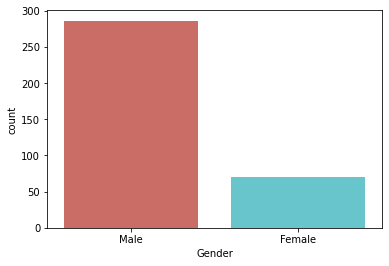

In [7]:
sns.countplot(x="Gender", data=loan_data, palette="hls")
plt.show()

In [8]:
countMale = len(loan_data[loan_data.Gender == 'Male'])
countFemale = len(loan_data[loan_data.Gender == 'Female'])
countNull = len(loan_data[loan_data.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(loan_data.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(loan_data.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(loan_data.Gender))*100)))

Percentage of Male applicant: 77.93%
Percentage of Female applicant: 19.07%
Missing values percentage: 3.00%


In [9]:
loan_data.Married.value_counts(dropna=False)

Yes    233
No     134
Name: Married, dtype: int64

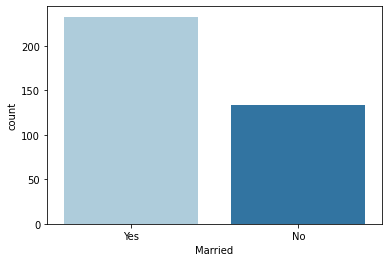

In [10]:
sns.countplot(x="Married", data=loan_data, palette="Paired")
plt.show()

In [11]:
countMarried = len(loan_data[loan_data.Married == 'Yes'])
countNotMarried = len(loan_data[loan_data.Married == 'No'])
countNull = len(loan_data[loan_data.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(loan_data.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(loan_data.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(loan_data.Married))*100)))

Percentage of married: 63.49%
Percentage of Not married applicant: 36.51%
Missing values percentage: 0.00%


In [12]:
loan_data.Education.value_counts(dropna=False)

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

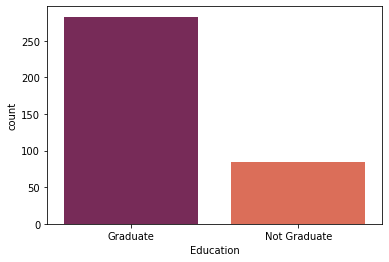

In [13]:
sns.countplot(x="Education", data=loan_data, palette="rocket")
plt.show()

In [14]:
countGraduate = len(loan_data[loan_data.Education == 'Graduate'])
countNotGraduate = len(loan_data[loan_data.Education == 'Not Graduate'])
countNull = len(loan_data[loan_data.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(loan_data.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(loan_data.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(loan_data.Education))*100)))

Percentage of graduate applicant: 77.11%
Percentage of Not graduate applicant: 22.89%
Missing values percentage: 0.00%


In [15]:
loan_data.Self_Employed.value_counts(dropna=False)

No     307
Yes     37
NaN     23
Name: Self_Employed, dtype: int64

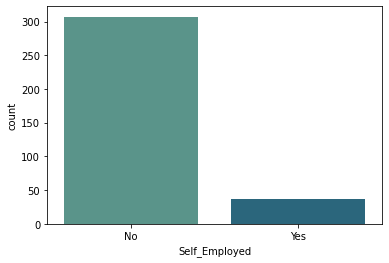

In [16]:
sns.countplot(x="Self_Employed", data=loan_data, palette="crest")
plt.show()

In [17]:
countNo = len(loan_data[loan_data.Self_Employed == 'No'])
countYes = len(loan_data[loan_data.Self_Employed == 'Yes'])
countNull = len(loan_data[loan_data.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(loan_data.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(loan_data.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(loan_data.Self_Employed))*100)))

Percentage of Not self employed: 83.65%
Percentage of self employed: 10.08%
Missing values percentage: 6.27%


In [18]:
data = loan_data
 
#loan_data.close()
  
# creating a dict file 
Loan_Approved = {0: 'N', 1: 'Y'}
  
# traversing through dataframe
# Gender column and writing
# values where key matches
data.Loan_Approved = [Loan_Approved[item] for item in data.Loan_Approved]
print(data)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1

In [19]:
loan_data.Loan_Approved.value_counts(dropna=False)

N    341
Y     26
Name: Loan_Approved, dtype: int64

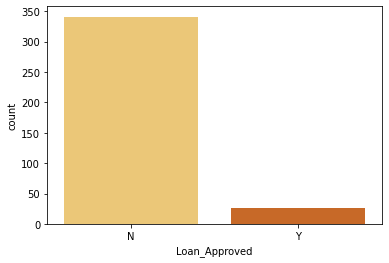

In [20]:
sns.countplot(x="Loan_Approved", data=loan_data, palette="YlOrBr")
plt.show()

In [21]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,N
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,N
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,N
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,N
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N


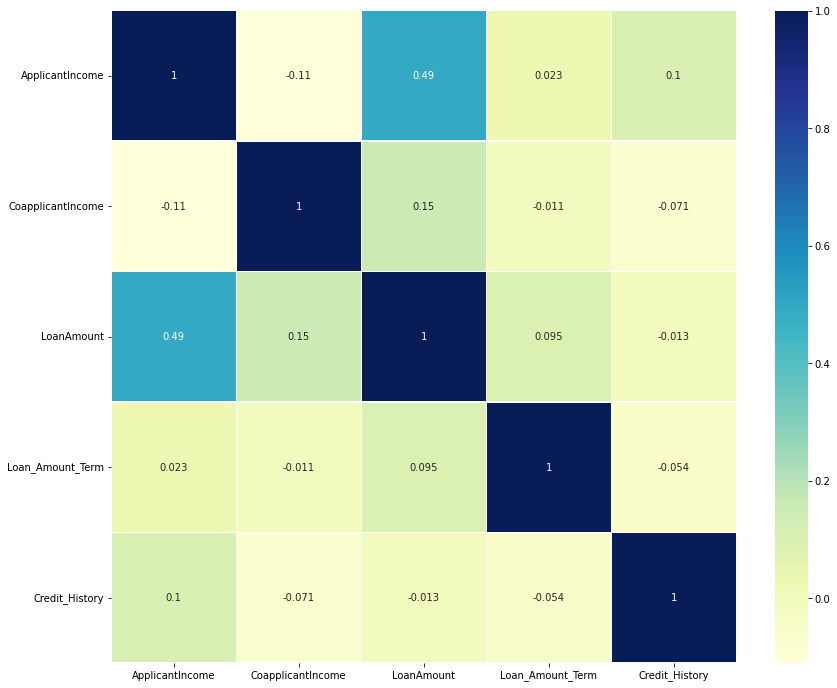

In [22]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))

sns.heatmap(loan_data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);

In [23]:
##check null values
loan_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Approved         0
dtype: int64

In [24]:
##drop unnecessary variables
loan_data = loan_data.drop(['Loan_ID'], axis = 1)

In [25]:
##Categorical Variables
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0],inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0],inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0],inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0],inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0],inplace=True)

In [26]:
## Numerical Variables
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(),inplace=True)

In [27]:
## One-hot Encoding --> for better prediction
loan_data = pd.get_dummies(loan_data)

# Drop columns
loan_data = loan_data.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Approved_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Approved_Y': 'Loan_Approved'}
       
loan_data.rename(columns=new, inplace=True)


In [28]:
X = loan_data.drop(['Loan_Approved'], axis=1)
y = loan_data['Loan_Approved']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
## Logistic Regression

LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        69
           1       0.00      0.00      0.00         5

    accuracy                           0.93        74
   macro avg       0.47      0.50      0.48        74
weighted avg       0.87      0.93      0.90        74

[[69  0]
 [ 5  0]]
LR accuracy: 93.24%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

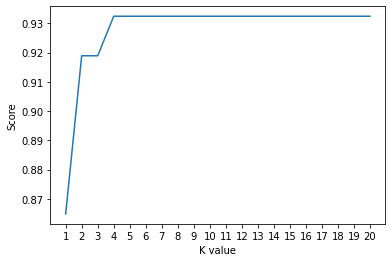

KNN best accuracy: 93.24%


In [31]:
##K-Nearest Neighbour (KNN)

scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [32]:
## Support Vector Machine (SVM)

SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        69
           1       0.00      0.00      0.00         5

    accuracy                           0.93        74
   macro avg       0.47      0.50      0.48        74
weighted avg       0.87      0.93      0.90        74

[[69  0]
 [ 5  0]]
SVC accuracy: 93.24%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
